In [81]:
import pandas as pd
import glob
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [89]:

path = './npolar.2021.e4b9a604-data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, decimal=',', delimiter=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.drop('ID', inplace=True, axis=1)
frame.drop_duplicates()


,Cruise-ID,Vessel,Obs_Date_ISO,Obs_Date_Excel,Obs_Lat,Obs_Lon,Ice_Conc,RV,Total,no10-50,...,Dim_as_average,View_radius,comments,no25-100,no100-200,no200-400,no400-800,no800-1600,no1600-3200,gt3200
0,787901,NellaDan,1978-12-13T18:30Z,13/12/1978 18:30,-58.72,111.50,x,x,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,787901,NellaDan,1978-12-13T21:30Z,13/12/1978 21:30,-58.88,110.67,x,x,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,787901,NellaDan,1978-12-13T23:30Z,13/12/1978 23:30,-59.03,110.00,x,x,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,787901,NellaDan,1978-12-14T01:30Z,14/12/1978 1:30,-59.17,109.30,x,x,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,787901,NellaDan,1978-12-14T03:40Z,14/12/1978 3:40,-59.22,109.00,x,x,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35660,101103,AuroraAustralis,2011-01-31T11:00Z,31/1/2011 11:00,-63.65,150.00,x,x,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35661,101103,AuroraAustralis,2011-01-31T12:00Z,31/1/2011 12:00,-63.50,150.02,x,x,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35662,101103,AuroraAustralis,2011-02-01T08:00Z,1/2/2011 8:00,-63.07,146.60,x,x,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35663,101103,AuroraAustralis,2011-02-01T09:00Z,1/2/2011 9:00,-63.05,146.47,x,x,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
frame.dtypes

Cruise-ID           int64
Vessel             object
Obs_Date_ISO       object
Obs_Date_Excel     object
Obs_Lat           float64
Obs_Lon           float64
Ice_Conc           object
RV                 object
Total             float64
no10-50           float64
no50-200          float64
no200-500         float64
no500-1000        float64
gt1000            float64
Ice_conc          float64
Freeboard         float64
Length            float64
Width             float64
Dim_as_average     object
View_radius       float64
comments           object
no25-100          float64
no100-200         float64
no200-400         float64
no400-800         float64
no800-1600        float64
no1600-3200       float64
gt3200            float64
dtype: object

In [97]:
frame["Obs_Lon"] = pd.to_numeric(frame["Obs_Lon"])
frame["Obs_Lat"] = pd.to_numeric(frame["Obs_Lat"])
frame = frame.dropna(subset=['Obs_Lon', 'Obs_Lat'])

<AxesSubplot:>

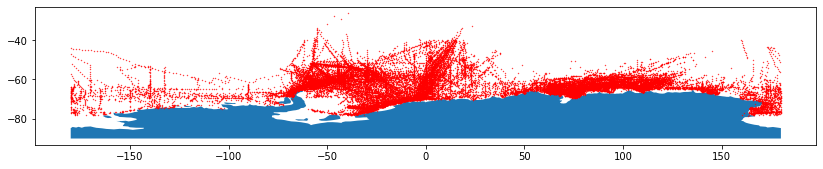

In [117]:
geometry = [Point(xy) for xy in zip(frame['Obs_Lon'], frame['Obs_Lat'])]
gdf = GeoDataFrame(frame, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name=="Antarctica"]
gdf.plot(ax=world.plot(figsize=(14, 70)), marker='.', color='red', markersize=.5)